# PRiAD2 - test zaliczający

Test obejmuje zagadnienia, których dotyczy skrypt PRiAD2 ale wymaga także wiedzy z wcześniejszych ćwiczeń.

In [1]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**Imię, nazwisko i numer indeksu:** (Aleksandra Kowalczyk 307414)

> **Zadanie 1** Wyświetl wykres liniowy średnich kursów **miesięcznych** walut pobranych z jednego z dwóch dostępnych plików

    rok  mies  dzien     CHF     USD     EUR     JPY
0  2010    10      5  2.9809  2.8838  3.9742  3.4617
1  2010    10      4  2.9614  2.8922  3.9577  3.4764
2  2010    10      1  2.9376  2.8772  3.9465  3.4535
3  2010     9     30  2.9955  2.9250  3.9870  3.5129
4  2010     9     29  2.9925  2.9227  3.9710  3.4933


[Text(0, 0.5, 'Wartość kursu waluty wyrażona w zł'),
 Text(0.5, 0, 'Rok,miesiąc')]

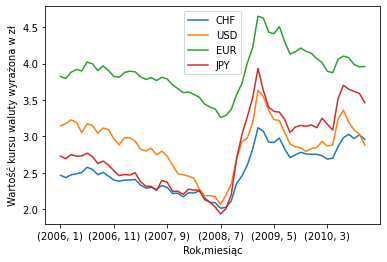

In [2]:
w = pd.read_excel('waluty1.xls')
print(w.head())
w.index = pd.to_datetime(w['rok'].map(str) + "-" + w['mies'].map(str) + "-" + w['dzien']
.map(str))
w = w.drop(columns=['dzien'])
w = w.groupby(by=['rok', 'mies']).mean()
w.plot().set(xlabel = 'Rok,miesiąc', ylabel = 'Wartość kursu waluty wyrażona w zł')

> **Zadanie 2** Wyswietl wykres kolumnowy przedstawiający średnie **roczne** kursy czterech walut pobranych z jednego z dwóch dostępnych plików

           CHF       USD       EUR       JPY
rok                                         
2006  2.477580  3.102624  3.898220  2.668684
2007  2.304686  2.768596  3.784313  2.349917
2008  2.217113  2.406099  3.512879  2.345935
2009  2.866745  3.118149  4.328159  3.332983
2010  2.864082  3.046696  4.001686  3.414996


[Text(0, 0.5, 'Wartość kursu waluty wyrażona w zł'), Text(0.5, 0, 'Rok')]

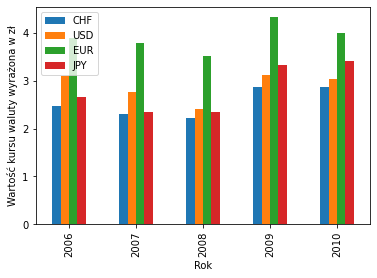

In [3]:
wa = pd.read_excel('waluty1.xls', header =0, usecols = [0,3,4,5,6], index_col = 0)
w.index.name= 'rok'
wa = wa.groupby(by=['rok']).mean()
print(wa.head())
wa.plot.bar().set(xlabel = 'Rok', ylabel = 'Wartość kursu waluty wyrażona w zł')


> **Zadanie 3** Wyświetl wykres słupkowy pokazujący liczbę ludności wszystkich dużych państw świata tj. liczących więcej niż 35 milionów mieszkańców w kolejności od najmniejszego do największego. 

[Text(0, 0.5, 'Country'), Text(0.5, 0, 'Population')]

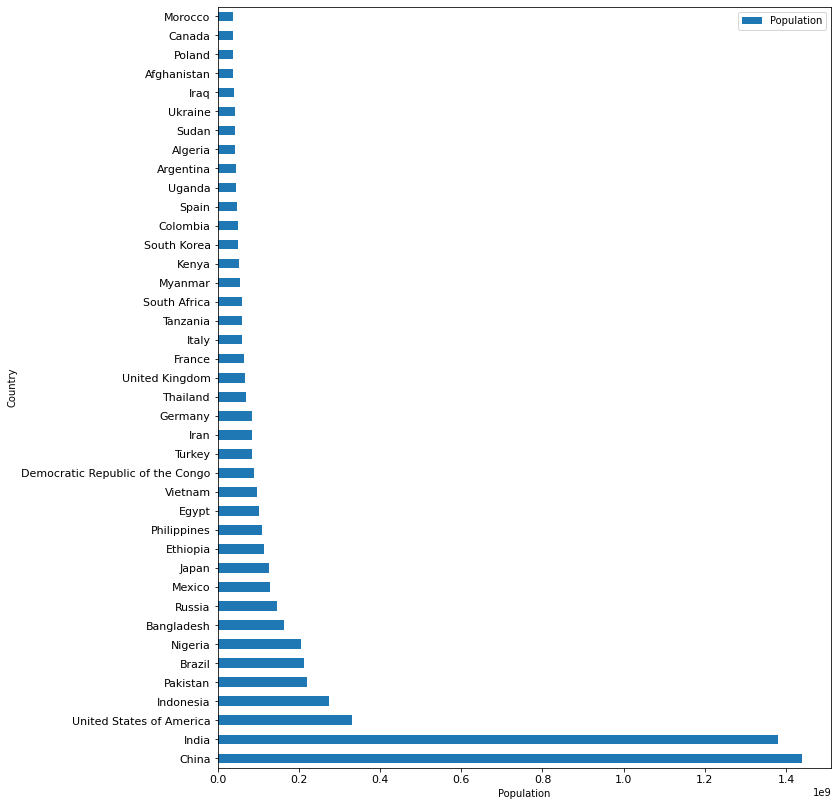

In [4]:
panstwa = pd.read_excel('alphabetical-list-of-countries2020.xlsx', header =4, usecols = [2,3,4], index_col = 0)
panstwa= panstwa[panstwa['Population']> 35000000]
panstwa= panstwa.sort_values(by=['Population'],ascending=False)
panstwa.plot(kind ='barh', fontsize= 11,figsize=(11,14)).set(xlabel = 'Population', ylabel = 'Country')


> **Zadanie 4** Narysuj histogramy poszczególnych atrybutów zbioru danych `iris` z podziałem na klasy, oraz macierz wykresów punktowych. Oceń przydatność poszczególnych atrybutów do rozróżniania odmian irysa

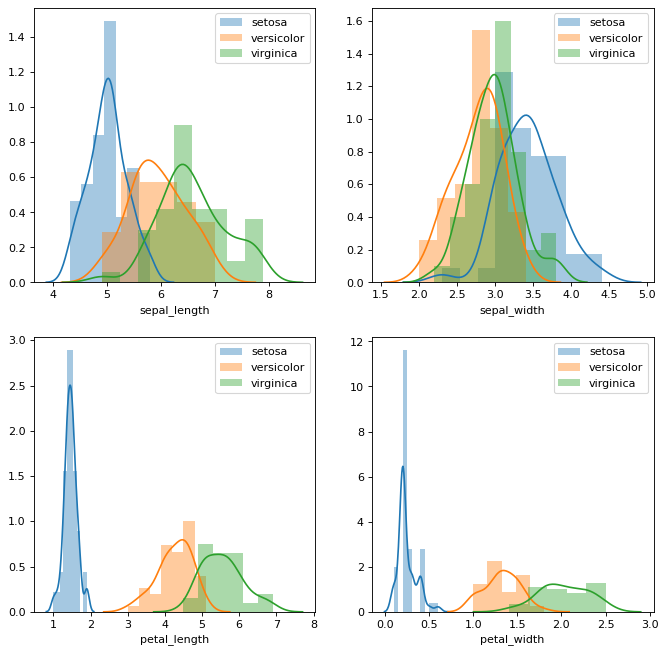

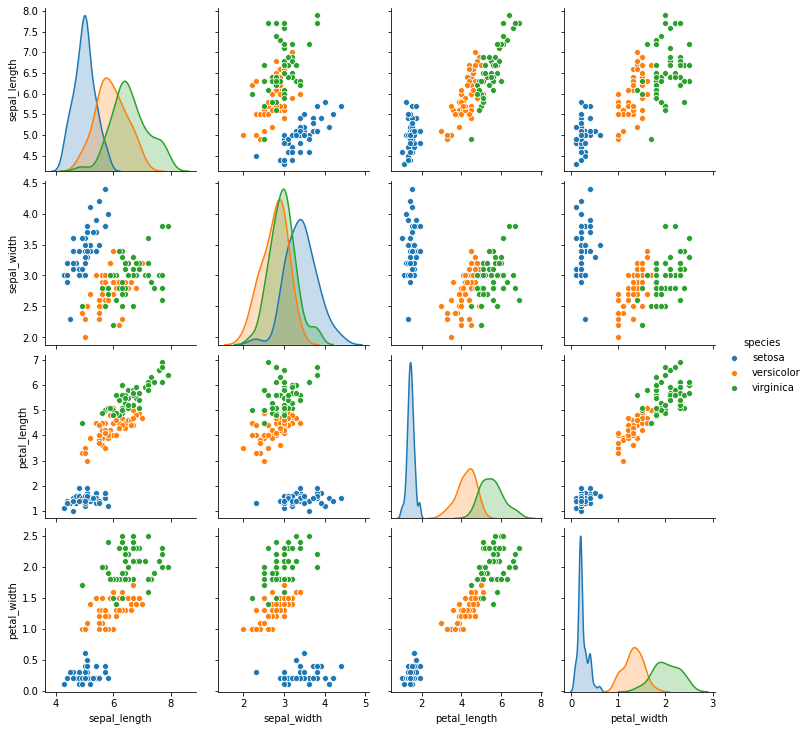

In [11]:
def show_atr(atr):
    sns.distplot(ir.loc[ir.species == 'setosa',atr], label="setosa")
    sns.distplot(ir.loc[ir.species == 'versicolor',atr], label="versicolor")
    sns.distplot(ir.loc[ir.species == 'virginica',atr], label="virginica")
    plt.legend();

ir = pd.read_csv('iris.csv', usecols = range(1,6))
plt.figure(figsize=(10,10), dpi= 80)
plt.subplot(2,2,1)
show_atr('sepal_length')
plt.subplot(2,2,2)
show_atr('sepal_width')
plt.subplot(2,2,3)
show_atr('petal_length')
plt.subplot(2,2,4)
show_atr('petal_width')

sns.pairplot(ir, kind="scatter", hue = 'species')
plt.show()


**Wnioski:** (tu wpisz wnioski - ocena przydatności atrybutów)
* petal_length jak i petal_width wydają mi się najbardziej skutecznymi atrybutami- wynika to z faktu, że dla różnych odmiach słupki w więkoszści nie pokrywają się- dlatego można stworzyć dość wyraźne przedziały długości i szerokości petral dla różnych odmian ( wśród nich najprościej wyróżnić jest setose, w której żaden kwiat nie miał takich wymiarów jak w innych gatunkach)

* w sepal_legth słupi znacznie nachodzą na siebie, przez co jedynie przy dużej ilości próbek moglibyśmy przypasować kwiaty do ich odmian- dla pojedynczych płatków ta metoda nie byłaby skuteczna, dla dużej grupy możemy korzystać z faktu, że histogram pokazuje nam trendy dla różnych odmian( setosa ma najmniejsze, versicolo większe a virginica największe)

* sepal_width nie jest zbyt skuteczna, prawie wszystkie słupki nachodzą na siebie, różnice dla grup są niewielki- jest to najmniej skuteczny atrubyt


> **Zadanie 5** Zmień nazwę tego skryptu na następującą "PRiAD2_Imię_Nazwisko.ipynb" i wgraj wgraj go do ISOD-a we wskazane miejsce, nie przekraczając wyznaczonego terminu.